## Gridding for cell tracking

In [2]:
import pyart
import time

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
data_file = '/home/rjackson/data/radar/cfrad.20110202_070002.000_to_20110202_070820.000_Gunn_Pt_v8793_UNKNOWN_SUR.nc'

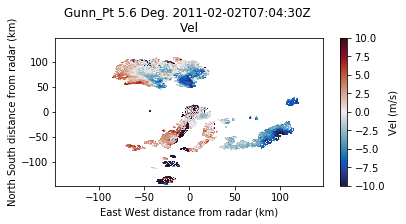

In [7]:
radar = pyart.io.read(data_file)
display = pyart.graph.RadarMapDisplay(radar)
plt.figure(figsize=(6,6))
plt.subplot(211)
display.plot_ppi('Vel', sweep=7, vmin=-10, vmax=10, cmap='pyart_balance')

In [149]:
def grid_radar(radar, grid_shape=(41, 201, 201), xlim=(-100000, 100000),
               ylim=(-100000, 100000), zlim=(0, 21000), bsp=1.0, 
               min_radius=500, h_factor=1.0, nb=1.0,
               fields=['DT', 'VT'], origin=None, gatefilter=False):
    bt = time.time()
    radar_list = [radar]
    if origin is None:
        origin = (radar.latitude['data'][0],
                  radar.longitude['data'][0])
    grid = pyart.map.grid_from_radars(
        radar_list, grid_shape=grid_shape,
        grid_limits=(zlim, ylim, xlim),
        grid_origin=origin, fields=fields,
        weighting_function='Barnes',
        gridding_algo='map_gates_to_grid',
        h_factor=h_factor,
        min_radius=min_radius,
        bsp=bsp,
        nb=nb, 
        gatefilters=[gatefilter])
    print(time.time() - bt, 'seconds to grid radar')
    return grid

In [150]:
grid = grid_radar(radar, fields=radar.fields.keys())

(3.7662220001220703, 'seconds to grid radar')


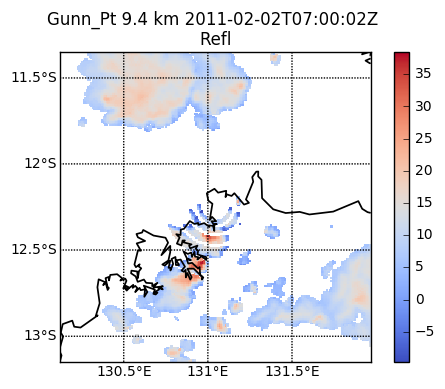

In [151]:
display_grid = pyart.graph.GridMapDisplay(grid)
display_grid.plot_basemap(   lat_lines=np.arange(-14.0, 11.0, 0.5),
                             lon_lines=np.arange(130.0, 133.0, 0.5),
                             resolution='i')
display_grid.plot_grid('Refl', level=18, cmap='coolwarm')

(-100, 100)

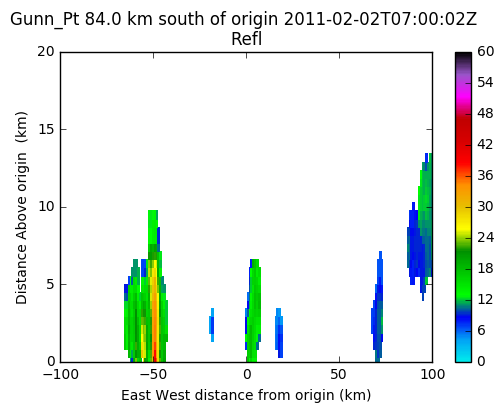

In [140]:
display_grid.plot_latitude_slice('Refl', lat=-13, lon=130.5,
                                 cmap=pyart.graph.cm.NWSRef,
                                 vmin=0, vmax=60) 
plt.ylim([0,20])
plt.xlim([-100,100])

KeyError: 'corrected_reflectivity'

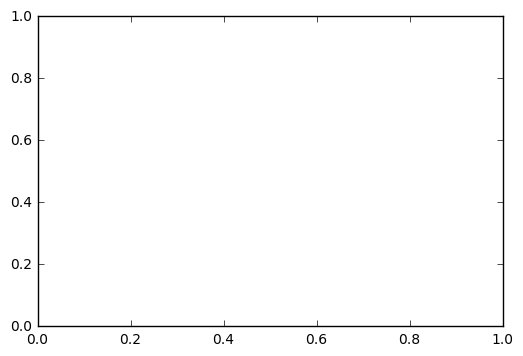

In [124]:
display_grid.plot_longitude_slice('corrected_reflectivity', lat=-11.75, lon=130.4,
                                 cmap=pyart.graph.cm.NWSRef,
                                 vmin=0, vmax=60) 
plt.ylim([0,20])
plt.xlim([-150,150])